<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week4/changbeom4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/content/"

train = pd.read_csv(drive_path + "train.csv")
test = pd.read_csv(drive_path + "test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [44]:
tain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [45]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [46]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


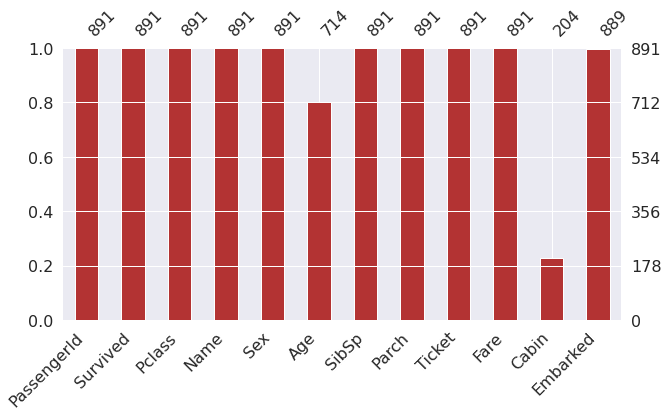

In [49]:
import missingno as msno
msno.bar(train, figsize = (10,5), color = (0.7, 0.2, 0.2))
plt.show()

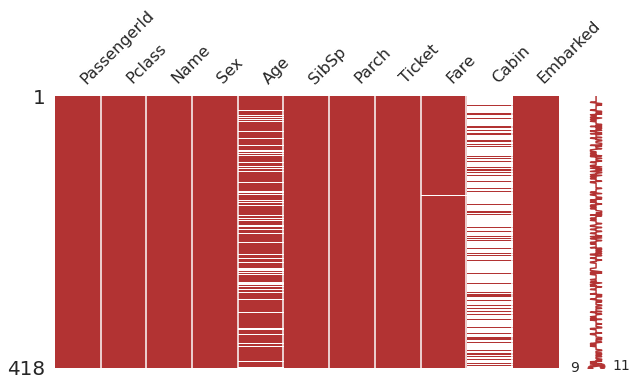

In [50]:
msno.matrix(test, figsize=(10,5), color = (0.7, 0.2, 0.2))
plt.show()

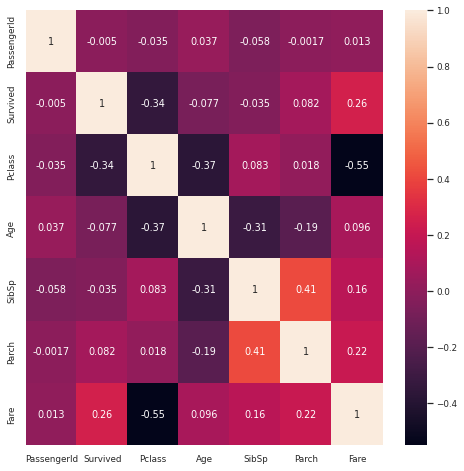

In [51]:
plt.figure(figsize = (8,8))
sns.set(font_scale = 0.8)
sns.heatmap(train.corr(), annot = True, cbar = True);
plt.show()

In [52]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis = 0)
print(data.shape)

(1309, 13)


In [53]:
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean()) 
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기: ", x_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", x_test.shape)

Train 데이터셋 크기:  (891, 5) (891,)
Test 데이터셋 크기:  (418, 5)


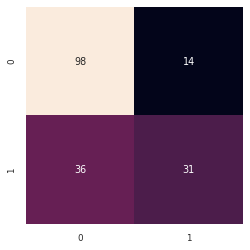

In [54]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, 
                                            shuffle = True, random_state = 20)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cbar = False, square = True)
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy: %.4f" %accuracy_score(y_val, y_val_pred))
print("Precision: %.4f" %precision_score(y_val, y_val_pred))
print("Recall: %.4f" %recall_score(y_val, y_val_pred))
print("F1: %.4f" %f1_score(y_val, y_val_pred))
print("AUC: %.4f" %roc_auc_score(y_val, y_val_pred))

Accuracy: 0.7207
Precision: 0.6889
Recall: 0.4627
F1: 0.5536
AUC: 0.6688


In [56]:
y_test_pred = lr_model.predict(x_test)

submission['Survived'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index = False)
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [57]:
train['Survived'].value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

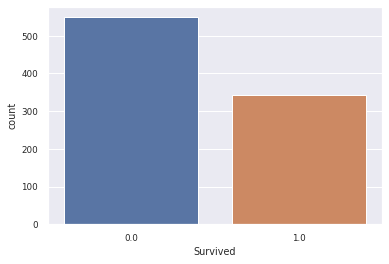

In [58]:
sns.countplot(x='Survived', data = data[data['TrainSplit'] == 'Train'])
plt.show()

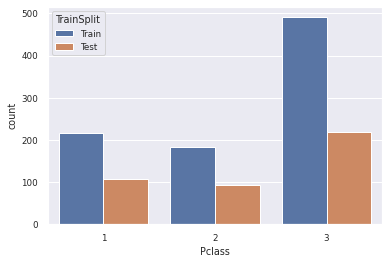

In [59]:
sns.countplot(x='Pclass', hue = 'TrainSplit', data = data)
plt.show()

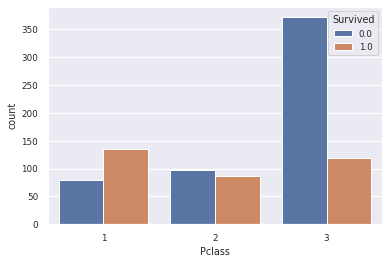

In [60]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data[data['TrainSplit']== 'Train'])
plt.show()

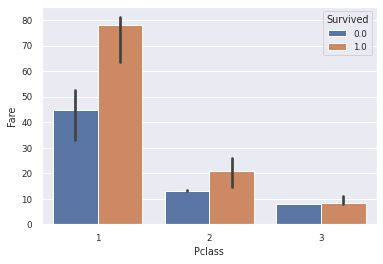

In [61]:
sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Survived',
            data = data[data['TrainSplit']=='Train'], estimator = np.median)
plt.show()

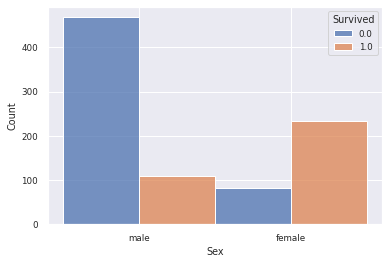

In [62]:
sns.histplot(x='Sex', hue = 'Survived', multiple = 'dodge',
             data = data[data['TrainSplit']=='Train'])
plt.show()

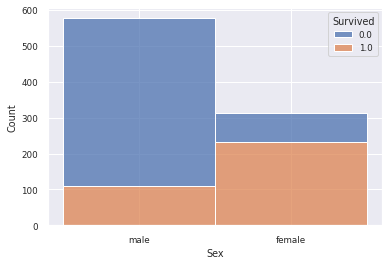

In [63]:
sns.histplot(x='Sex', hue = 'Survived', multiple = 'stack',
             data = data[data['TrainSplit']=='Train'])
plt.show()

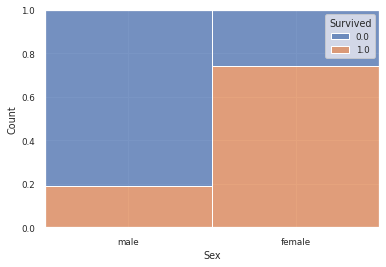

In [64]:
sns.histplot(x='Sex', hue = 'Survived', multiple = 'fill',
             data = data[data['TrainSplit']=='Train'])
plt.show()

In [65]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [76]:
title_name = data['Name'].str.split(", ", expand = True)[1]
title_name

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: 1, Length: 1309, dtype: object

In [77]:
title = title_name.str.split(".", expand = True)[0]
title.value_counts(dropna = False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: 0, dtype: int64

In [78]:
title = title.replace(['Ms'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'], 'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'Priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna = False)

Mr         757
Miss       262
Mrs        197
Master      61
Priest      16
Noble        9
Officer      7
Name: Title, dtype: int64

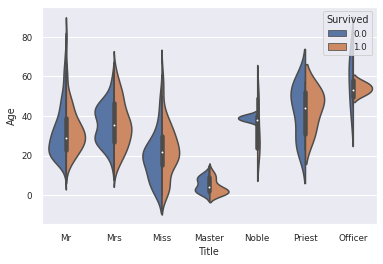

In [79]:
sns.violinplot(x='Title', y='Age', hue = 'Survived', data = data, split = True)
plt.show()